## Machine Learning Essentials 
Model -

Machine learning models are computer programs that are used to recognize patterns in data or make predictions. Machine learning models are created from machine learning algorithms, which are trained using either labeled, unlabeled, or mixed data. So, basically a mathematic function is sort of a model.

Linear regression makes predictions that are simply a __`w`eighted__ combination (a linear combination) of the inputs (plus some offset called __`b`ias__). It is described by a linear function:

$$
    y = wx + b
$$
__Linear regression predicts continuous outputs__, hence the regression part of the name

In [25]:
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the California housing dataset
california_data = datasets.fetch_california_housing()
# Assign the features (data) to X and labels (target) to y
X = california_data.data
y = california_data.target
print("Shape of Features (X):", X.shape)
print("Shape of Labels (y):", y.shape)
'''
Another way to load the dataset
X, y = datasets.fetch_california_housing(return_X_y=True)
'''


Shape of Features (X): (20640, 8)
Shape of Labels (y): (20640,)


In [5]:
X_train, X_temp, y_train, y_temp = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = model_selection.train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Validation Features (X_val):", X_val.shape)
print("Shape of Test Features (X_test):", X_test.shape)
print("Shape of Training Labels (y_train):", y_train.shape)
print("Shape of Validation Labels (y_val):", y_val.shape)
print("Shape of Test Labels (y_test):", y_test.shape)

Shape of Training Features (X_train): (16512, 8)
Shape of Validation Features (X_val): (2064, 8)
Shape of Test Features (X_test): (2064, 8)
Shape of Training Labels (y_train): (16512,)
Shape of Validation Labels (y_val): (2064,)
Shape of Test Labels (y_test): (2064,)


The task here is `LinearRegression` implementation.

- Create a class `LinearRegression` that accepts a single `n_features` argument during initialisation.
    - Create `W` and `b` variables during initialisation. One of shape `(n_features, 1)` and `bias` of shape `1`, initialised with a random normal distribution.
- Create a `__call__` function (find out what it does and what a functor is) that accepts `X` (`np.array`). It should return the predictions made by our linear-regression analysis (see the formulas in the figure above; only two operations are required).
- Create the `update_params` function which accepts `W` and `b` and assigns them to appropriate variables in `self`.

In [27]:
class LinearRegression:
    def __init__(self, n_features: int): # initalise parameters
        np.random.seed(10)
        self.W = np.random.randn(n_features, 1) ## randomly initialise weight
        self.b = np.random.randn(1) ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate the output from an input in our model?
        ypred = np.dot(X, self.W) + self.b
        return ypred # return prediction
    
    def update_params(self, W, b):
        self.W = W ## set this instance's weights to the new weight value passed to the function
        self.b = b ## do the same for the bias

In [28]:
model = LinearRegression(n_features=8)  # instantiate our linear model
y_pred = model(X_test)  # make predictions with data
print("Predictions:\n", y_pred[:10]) # print the first 10 predictions
print("Predictions:\n", y_test[:10])

[[ 475.12681168]
 [ 406.55644012]
 [ 252.47278832]
 [ 850.86155399]
 [ 190.65306424]
 [ 654.61060225]
 [1045.72424413]
 [1534.68628289]
 [ 170.78972425]
 [ 281.27102029]]
[2.385 3.297 0.952 2.451 0.641 3.766 2.307 1.752 4.167 0.938]


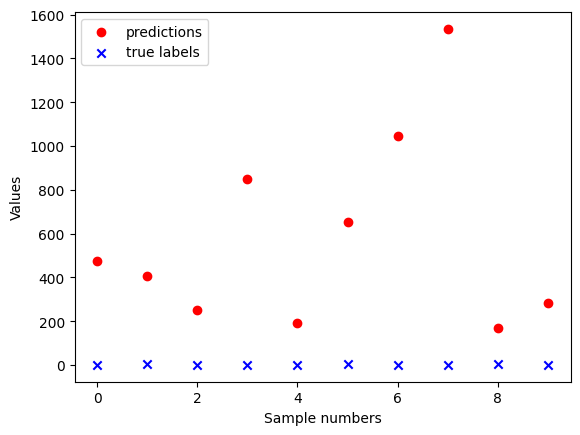

In [29]:
def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

plot_predictions(y_pred[:10],y_test[:10])

As you can observe, the predictions of our model are way off. This occurred because we initialised our model with random weights and biases.

Now we can learn from our data - 
- Loss enables the measurement of the performances of models. The loss should measure the performance of our model. The loss value needs to return a single number, not a vector or a matrix.
- Squared-error loss
    - The loss is a function that accepts predictions and true labels and returns a positive scalar.
    - The higher the loss value, the worse the model's performance.
    - The loss is defined on a single data point.
- Mean-squared error (MSE) cost function
    - The cost function is a generalisation of the loss functions for many data samples.


In [30]:
def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
    errors = y_pred - y_true  ## calculate errors
    squared_errors = errors ** 2  ## square errors
    return np.mean(squared_errors)

cost = mean_squared_error(y_pred, y_train)
print(cost)

Now that we have our loss equation, we can calculate its derivative w.r.t. the weights. When we set it to zero, we can calculate the weights values (W), which minimise the MSE.
- For the matrix inverse, we use the np.linalg.inv function.
- Remember to return the weights part of the matrix first and the bias afterwards (bias is the 0 element of the result).

In [31]:
def minimize_loss(X_train, y_train):
    X_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    optimal_w = np.matmul(
        np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)),
        np.matmul(X_with_bias.T, y_train),
    )
    return optimal_w[1:], optimal_w[0]


weights, bias = minimize_loss(X_train, y_train)
print(weights, bias)

[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01] -37.02327770519514


As you may have noticed, there is no mention of the model bias in this analytical solution. In fact, we incorporated the model bias into our features matrix by adding an extra column filled with 1. Now, we'll update the parameters

In [32]:
model.update_params(weights, bias)
y_pred = model(X_train)
cost = mean_squared_error(y_pred, y_train)
print(cost)

0.51793312552467


In [33]:
print(y_pred[:10])
print(y_test[:10])

[1.93725845 2.48910616 2.64735483 1.56589492 1.61312839 3.2835959
 1.54483704 4.13952963 0.84330441 2.65994108]
[2.385 3.297 0.952 2.451 0.641 3.766 2.307 1.752 4.167 0.938]


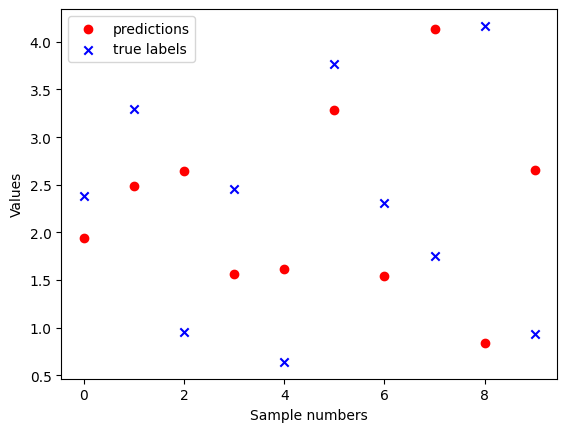

In [34]:
plot_predictions(y_pred[:10],y_test[:10])

#### Model in SkLearn:
sklearn comes with some common ML models that can be utilised out of the box, with an intuitive API. 
sklearn ML algorithms are objects with the following general syntax:
- __init__(*args, **kwargs): setup your algorithm (as shown above).
- fit(X, [y]): train the model on X (features) and y (targets). For unsupervised algorithms, there is no y.
- predict(X): pass data (previously unseen) to the algorithm after the fit is called. This gives us predictions (y_pred).


In [56]:
from sklearn import linear_model

X, y = datasets.fetch_california_housing(return_X_y=True)

model = linear_model.LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

print(y_pred[:5], "\n", y[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744] 
 [4.526 3.585 3.521 3.413 3.422]


In [57]:
# Below, we import sklearn.metrics.mean_squared_error using the from import syntax and display the error between the true targets and the predicted ones.
from sklearn import metrics
print(metrics.mean_squared_error(y, y_pred))
# As is known, the training (fitting) process is often quite expensive (in terms of time and/or computation cost). What is important is the ability to predict on unseen data.
# Having established that your model works as expected, the next logical step is to save it for later use without the need to train on the data again
# we can save our model using joblib
import joblib
joblib.dump(model, "model.joblib")

0.5243209861846072


['model.joblib']

#### Drawbacks of `sklearn`

As `sklearn` is very high level, it does not require much knowledge to use.

However, __adequate and somewhat diverse knowledge__ is required to do ML properly.

Here are some important things to note.

- Why and what for: there are many more ways (and considerably better) to do ML.
- Knowledge of ML algorithms: it is important to know which ones to choose for different kinds of problems.
- Knowledge of possible pitfalls: ML can easily go wrong. It is important to know more about it to improve our model's performance.
- In-depth knowledge of the ideas: often, it might be a good idea to implement major ideas on your own.
#### `sklearn` tips

- __Always attempt the easiest solution first__: create a weak baseline algorithm, and scrutinise its performance. Do not go straight to the most complicated ones. This concept is called [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) in philosophy and ML as well.
- Some algorithms have attributes that might interest you. They are usually suffixed by `_`; for example, `my_algorithm.interesting_attribute_`.
- Some `__init__` functions have __many possible arguments__. Each of them influences the performance of the algorithm. Find out the ones with the highest importance and the most influence. __In `sklearn`, those arguments come in the order of most influential to least influential.__
- Many `sklearn` algorithms provide the `n_jobs` argument, which parallelises `fit`, `predict` and other functions. You can employ `n_jobs=-1` to use as many processes as there are virtual cores (it is often a reasonable amount), which improves performance tremendously.
- __Use idiomatic `sklearn`__: search the documentation, and use pipelines if possible.



## Practicals
### Task 1
- Create a conda environment called “sk_learn_tutorial”, with pip , numpy and sk-learn installed. You can specify all of this in the conda create statement, see the docs 
- Activate the environment and install the sklearn package using pip.
- Create a file called linear_regression.py. Inside the file, import the datasets and model selection modules from sci-kit learn.
- Fetch the California dataset of California real estate prices, and assign the labels and features to variables called X and y. Print the shape of the features and labels.
- Divide the dataset into train, validation and test subsets, using the model_selection.train_test_split method. Hint - you will need to apply the method twice to generate the three subsets.
- Create a class called LinearRegression. The class should have two methods - the class constructor, which needs to randomly assign initial weights for each feature, and set a random seed for reproducibility. A method called call that runs when we call an instance of the class on some data, and returns a prediction based on the features in X.
- Create an instance of LinearRegression and use it to get the predictions based on the initial weights. Print the first 10 examples. Now print the first 10 actual values of y. What do you notice?
- We now need to tell the model how to improve. Add a new method to the LinearRegression class, called update_parameters. This method should update the model's weight and bias attributes to new values which are passed to the method as parameters.
- Define a function inside linear_regression.py that takes in the predictions and the labels, and calculates the squared error of the difference between them.
- Call this function on the initial predictions and the labels, and assign the output to a variable called cost.
- Define a function inside linear_regression.py that takes in the features and labels of the training set and calculates the optimum values of the weights and biases for each feature. You can refer to the Notebook for help here!
- Call this function on X_train and y_train and assign the outputs to variables called weights and biases.
- Update the model with these optimised weights and biases using the update_parameters method.
- Call the model on the X_train data again, and use the mean_squared_error method to calculate the loss with the updated parameters.
- Finally, print out the first few values of y_train and y_pred again. Do they look any better?

1. Created the environment using `conda create -n sk_learn_tutorial python=3 pip numpy scikit-learn`
2. Created the file.
3. Run it to see the results.


### Task 2
- Use scikit-learn to create a linear regression model for the house prices in the California dataset, this time using scikit-learn's linear model.
- Evaluate the model on the test data using scikit-learn's MSE metric.
- Save the finished model to disk.

Mean Squared Error: 0.5558915986952425


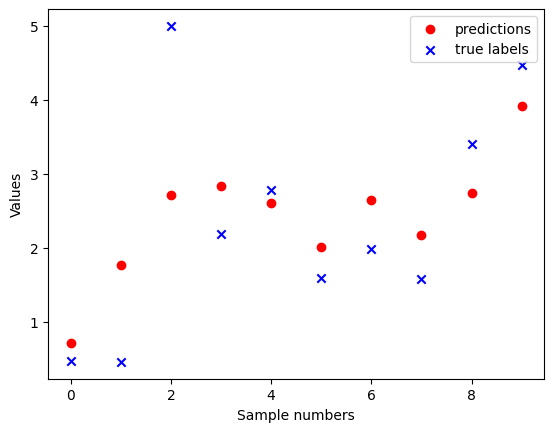

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Step 1: Load the California dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model using MSE metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plot_predictions(y_pred[:10],y_test[:10])

# Step 6: Save the trained model to disk
#joblib.dump(model, 'linear_regression_model.pkl')


### Task 3
- Create a linear regression model of some example data with scikit-learn.
- Use the matplotlib library to plot the first 20 real and predicted label values as two series on a graph, where the X-axis is samples, and the Y-axis is the value of the label.
- Now instead plot the MSE in the same way.

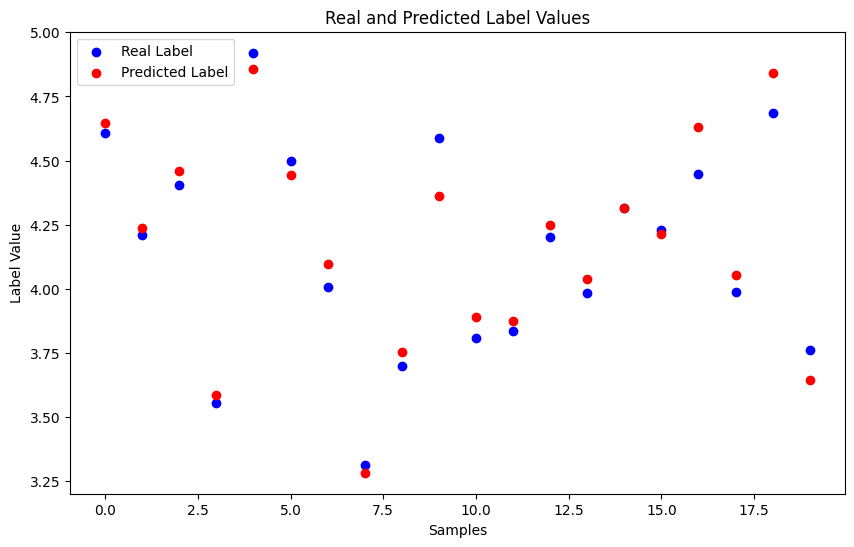

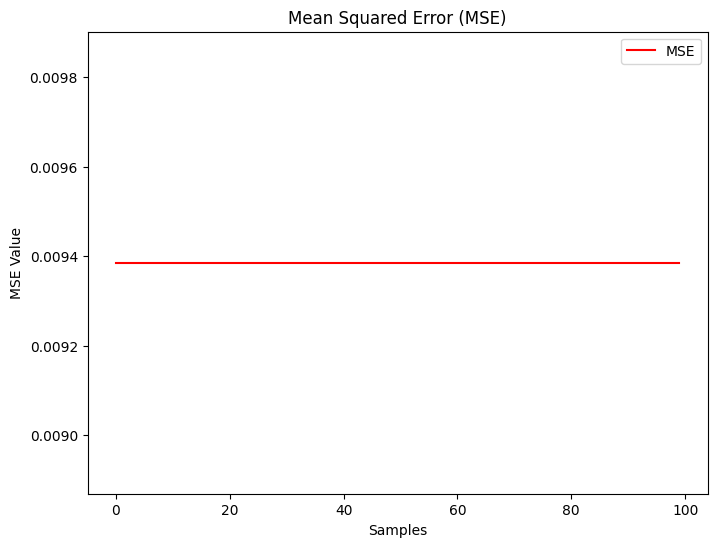

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example data
X = np.random.rand(100, 1)
y = 2 * X + 3 + np.random.normal(0, 0.1, (100, 1))

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the first 20 real and predicted label values
plt.figure(figsize=(10, 6))
plt.scatter(range(20), y[:20], color='blue', label='Real Label')
plt.scatter(range(20), y_pred[:20], color='red', label='Predicted Label')
plt.xlabel('Samples')
plt.ylabel('Label Value')
plt.title('Real and Predicted Label Values')
plt.legend()
plt.show()

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Plot the MSE
plt.figure(figsize=(8, 6))
plt.plot(range(len(y)), [mse] * len(y), color='red', label='MSE')
plt.xlabel('Samples')
plt.ylabel('MSE Value')
plt.title('Mean Squared Error (MSE)')
plt.legend()
plt.show()


### Importance of Validation Sets
- ML models are only useful if they can generalise and make good predictions on unseen data.
- Test Set:
    The test set is used for evaluating if a model meets the desired requirements and for estimating its real-world performance. It is not employed for making choices about the model.

    The decision to choose between two models cannot be based on the testing set. If that were the case, the decisions would be biased, leaning towards our expectations.
    Making a decision based on the testing set is analogous to seeing the answers on a test.
- Validation set:
    Instead, we create another set, called the validation set. This set is used for comparing models or different options for the same model, and the process is referred to as cross validation.


In [62]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

print(f"Number of samples in dataset: {len(X)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")

X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.3
)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")



Number of samples in dataset: 506
Number of samples in:
    Training: 354
    Testing: 152
Number of samples in:
    Training: 354
    Validation: 46
    Testing: 106


The difference is that the validation set, not the test set, is employed to make choices about models.

In [63]:
import numpy as np
# ML algorithms you will later know, don't panic
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

np.random.seed(2)

models = [
    DecisionTreeRegressor(splitter="random"),
    SVR(),
    LinearRegression()
]

for model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_validation_pred = model.predict(X_validation)
    y_test_pred = model.predict(X_test)

    train_loss = mean_squared_error(y_train, y_train_pred)
    validation_loss = mean_squared_error(y_validation, y_validation_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    print(
        f"{model.__class__.__name__}: "
        f"Train Loss: {train_loss} | Validation Loss: {validation_loss} | "
        f"Test Loss: {test_loss}"
    )

DecisionTreeRegressor: Train Loss: 0.0 | Validation Loss: 28.235000000000003 | Test Loss: 16.286037735849057
SVR: Train Loss: 69.85565409803411 | Validation Loss: 62.36581675492926 | Test Loss: 63.03778607253605
LinearRegression: Train Loss: 21.213462909983292 | Validation Loss: 39.00514517333327 | Test Loss: 21.420451166897237


- As you can observe, the best validation loss is for linear regression. This is the model we should choose. Unfortunately, it occurs that on 'real' (test) data, it performs worse than the Decision Tree.

- Pseudo-random number generators
Many ML algorithms employ random initialisation to, for example, instantiate the parameters of a linear regression model. Depending on the algorithm, it may have a more- or less-severe effect on the result.

- Each time you run an algorithm randomly, the result may vary to some degree.
Random number generators employ a seed, which is a numerical value that determines what values will be generated.
For each run to be the same, (or to exhibit some phenomena similar to the case above), we should always seed all functions using random numbers.
The last one is quite easy in numpy and sklearn as it is a single line. Seeding via this approach is common in most frameworks.

- Benefits of seed initialisation
To ensure the reproducibility of experiments, which is particularly important in ML.
To ensure an equal outcome for all runs.
Always set a random seed to make sure your results are repeatable when some part of the code involves random numbers being generated.

- Data leakage refers to a situation where a model has access to information about the testing sets. Definitely, in the real world, when working with new examples, the model will not know anything about the incoming data. This means that in training, the separation must be carefully preserved.

    - Never make any decisions about your model design using the test set.

    - Causes
    Data leakage can be caused by bad data splitting. These include the following cases:

    - Some samples are both in training and validation.
    The model is evaluated based on its performance on the training data.

In [64]:
def calculate_validation_loss(X_train, y_train, X_validation, y_validation):
    model = LinearRegression()

    # Without data leakage, train on train, validate on validation
    model.fit(X_train, y_train)
    y_validation_pred = model.predict(X_validation)
    validation_loss = mean_squared_error(y_validation, y_validation_pred)

    print(f"Validation loss: {validation_loss}")
    
# Without data leakage, train on train, validate on validation
calculate_validation_loss(X_train, y_train, X_validation, y_validation)

# With data leakage, 50 samples from validation added
fail_X_train = np.concatenate((X_train, X_validation[:50]))
fail_y_train = np.concatenate((y_train, y_validation[:50]))

calculate_validation_loss(fail_X_train, fail_y_train, X_validation, y_validation)

Validation loss: 39.00514517333327
Validation loss: 32.193318017558646


- Validation set is used to find info about best algorithms, best set of arguments to algoirthms etc.
- Test set is used to check how our algorithm performs on unseen data
- __As we tune algorithms according to `validation` dataset we cannot use it to check performance__
- `seed` is used to ensure reproducibility. Also multiple runs for experiments are good if our code depends on random initialization heavily (we can take mean results of experiments)
- Data leakage is information from `validation` (or `test`) leaking into training
- Data leakage leads to falsely good results and should be avoided
- Rule of thumb: imagine you only have training dataset when doing preprocessing. Anything you calculate from it cannot be used in `validation` or `test`

### Task 4
- Download the diabetes dataset using the sklearn.datasets module.
- Use the train_test_split function from sklearn to split the diabetes dataset into a train set and a validation set.
- Split the validation set into two equal parts, naming one of them validation and the other test.

In [52]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")
print(f"    Validation: {len(y_val)}")

Number of samples in:
    Training: 353
    Testing: 44
    Validation: 45
